                                                    Lab-5
Pradhumna Singh
201B182
                                    Classification(Mnist dataset)



In [ ]:
#Python and Sciket Learn is already installed in my System.

In [14]:
# 3. Load MNIST dataset for handwritten digits:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()                           

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [15]:
# 4.

In [16]:
 # 5. Separate data and target and store them into X and y respectively.
X = mnist["data"]
y = mnist["target"]

In [17]:
 # 6. Check the size and shape of data and target, and print.
print("Shape and size of data is: ",X.shape,X.size)
print("Shape and size of target is: ",y.shape,y.size)

Shape and size of data is:  (70000, 784) 54880000
Shape and size of target is:  (70000,) 70000


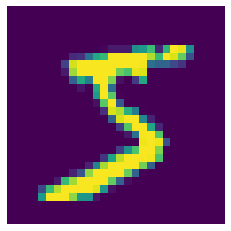

In [18]:
# 7. Use imshow function of matplotlib.pyplot to show any value of X as an image.
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
some_digit=X[0:1]
some_digit=np.array(some_digit)
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image)
plt.axis("off")
plt.show()

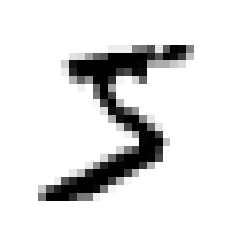

In [19]:
# 8. Show the digit image in grey scale (use color map binary).
plt.imshow(some_digit_image, cmap = mpl.cm.binary)
plt.axis("off")
plt.show()

In [20]:
# 9. Convert the target values to unsigned int8, if these are not integer type.
print(type(y[0]))
y = y.astype(np.uint8)
print(type(y[0]))

<class 'str'>
<class 'numpy.uint8'>


In [21]:
#10. Divide the datasets, X and y, into train and test, follow the advicegiven in the datasets description for size of train and test.
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [22]:
#11.Train a Binary Classifier:
#11.1. Convert the target dataset into Binary (True and False) for a digit 5
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [23]:
#11.2. Select SGD classifier from Scikit-Learn for the purpose, as it is capable for handling very large datasets efficiently.
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()

In [24]:
#11.3. Make your results reproducible by using any random state value for the classifier.
sgd_clf = SGDClassifier(random_state=42)


In [25]:
#11.4. Train the classifier with train dataset and corresponding target in binary.
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

Succesfull
5


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


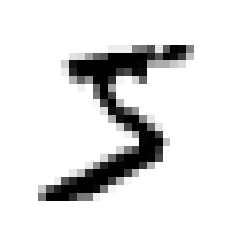

In [26]:
# 12. Write a python function “prediction” to predict any value from the dataset
# ,check if it is matching with corresponding target value and print message
# “successful” if matching otherwise “unsuccessful”. Also show the imageof␣ dataset
# value passed as a parameter to the function “prediction”.
def prediction():
  res=sgd_clf.predict(some_digit)
  if(res[0]==True):
    print("Succesfull")
  else:
    print("Unsuccesfull")
prediction()
print(y[0])
plt.imshow(some_digit_image, cmap = mpl.cm.binary)
plt.axis("off")
plt.show()


In [27]:
# 13. Create a function to measure the accuracy of the classifier you trained in previous problem. Compute and print the number of correct prediction and
# incorrect predictions of the trained classifier. Return the ratio of number of correct predictions and the total
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=None)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.values[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train.values[test_index]
    y_test_fold = y_train_5[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))


0.95035
0.96035
0.9604


In [28]:
# 14. Compute classifier’s accuracy on train as well as on test dataset using cross_val_score function from sklearn’s model selection module.
from sklearn.model_selection import cross_val_score
print("Accuracy on train dataset: ",cross_val_score(sgd_clf, X_train,y_train_5, cv=3, scoring="accuracy"))
print("Accuracy on test dataset: ",cross_val_score(sgd_clf, X_test, y_test_5,cv=3, scoring="accuracy"))


Accuracy on train dataset:  [0.95035 0.96035 0.9604 ]
Accuracy on test dataset:  [0.95110978 0.95439544 0.96879688]


In [32]:
# 15. Compare the accuracy of the trained classifier with a dumb classifier (the
# classifier which predicts every value of train dataset as False) on train
# dataset and print the accuracy of both classifiers. (You can use method
# mentioned in above problem).
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [30]:
# 16.Compute the confusion matrix of the classifier’s predictions for train
# dataset, and print the output in the form of TP,FP,FN,TN. Repeat the
# same process for test dataset also.
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
Matrix_train=confusion_matrix(y_train_5, y_train_pred)
TN_train=Matrix_train[0][0]
FP_train=Matrix_train[0][1]
FN_train=Matrix_train[1][0]
TP_train=Matrix_train[1][1]
print("TN of train dataset: ",TN_train)
print("FP of train dataset: ",FP_train)
print("FN of train dataset: ",FN_train)
print("TP of train dataset: ",TP_train)
print("\n")
y_test_pred = cross_val_predict(sgd_clf, X_test, y_test_5, cv=3)
Matrix_test=confusion_matrix(y_test_5, y_test_pred)
TN_test=Matrix_test[0][0]
FP_test=Matrix_test[0][1]
FN_test=Matrix_test[1][0]
TP_test=Matrix_test[1][1]
print("TN of test dataset: ",TN_test)
print("FP of test dataset: ",FP_test)
print("FN of test dataset: ",FN_test)
print("TP of test dataset: ",TP_test)

TN of train dataset:  53892
FP of train dataset:  687
FN of train dataset:  1891
TP of train dataset:  3530


TN of test dataset:  8936
FP of test dataset:  172
FN of test dataset:  247
TP of test dataset:  645


In [31]:
#17. Write a function to compute and print precision of the classier on train dataset as well as on test dataset separately.
P_train=(TP_train/(TP_train+FP_train))
P_test=(TP_test/(TP_test+FP_test))
print("Precision on train dataset: ",P_train)
print("Precision on train dataset: ",P_test)

Precision on train dataset:  0.8370879772350012
Precision on train dataset:  0.7894736842105263


In [33]:
# 18. Write a function to compute and print recall of the classier on train dataset as well as on test dataset separately.
R_train=(TP_train/(TP_train+FN_train))
R_test=(TP_test/(TP_test+FN_test))
print("Precision on train dataset: ",R_train)
print("Precision on train dataset: ",R_test)

Precision on train dataset:  0.6511713705958311
Precision on train dataset:  0.7230941704035875


In [34]:
# 19. Compute the precision and recall of the train and test datasets using built-in functions precision_score, recall_score of sklearn’s metrics module.
from sklearn.metrics import precision_score,recall_score
print("Precision on train dataset: ",precision_score(y_train_5, y_train_pred))
print("Precision on test dataset: ",precision_score(y_test_5, y_test_pred))
print("\n")
print("Recall on train dataset: ",recall_score(y_train_5, y_train_pred))
print("Recall on test dataset: ",recall_score(y_test_5, y_test_pred))


Precision on train dataset:  0.8370879772350012
Precision on test dataset:  0.7894736842105263


Recall on train dataset:  0.6511713705958311
Recall on test dataset:  0.7230941704035875


In [35]:
#20. Compute f1 score manually as well as using built-in functions f1_score. Manually f1 score
F1_train=2*((P_train*R_train)/(P_train+R_train))
F1_test=2*((P_test*R_test)/(P_test+R_test))
print("Manually F1 score of train dataset: ",F1_train)
print("Manually F1 score of test dataset: ",F1_test)
print("\n")
# Using built-in functions f1_score
from sklearn.metrics import f1_score
print("Using in built function f1 score of train dataset: ",f1_score(y_train_5,y_train_pred))
print("Using in built function f1 score of test dataset: ",f1_score(y_test_5,y_test_pred))


Manually F1 score of train dataset:  0.7325171197343846
Manually F1 score of test dataset:  0.7548273844353423


Using in built function f1 score of train dataset:  0.7325171197343846
Using in built function f1 score of test dataset:  0.7548273844353423
